In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# https://www.intechopen.com/books/fractal-analysis/fractal-analysis-of-time-series-data-sets-methods-and-challenges
# https://en.wikipedia.org/wiki/Fractal_analysis

In [4]:
df = pd.read_csv("intern_dataset.csv",index_col=[0],parse_dates=[0])

In [5]:
df.head()

,Signal1,Signal2,Label
Time,,,
2017-08-14 11:37:49.791,33668.091913,0.856726,A
2017-08-14 11:37:49.801,32564.903040,0.856705,A
2017-08-14 11:37:49.811,31454.043305,0.856683,A
2017-08-14 11:37:49.821,30335.387166,0.856659,A
2017-08-14 11:37:49.831,29207.142938,0.856634,A


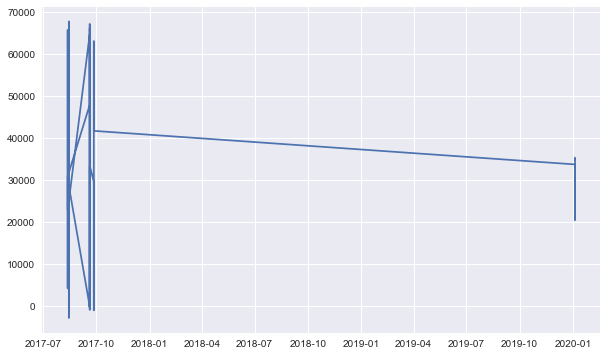

In [6]:
# Plotting Signal 1
Signal1 = df['Signal1']
plt.figure(figsize=(10,6))
plt.plot(Signal1)
plt.show()

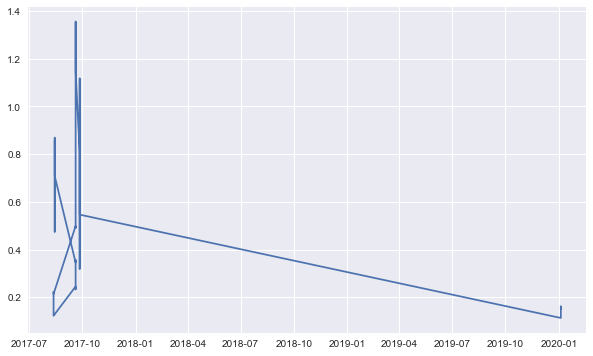

In [7]:
#Plotting Signal 2 
Signal2 = df['Signal2']
plt.figure(figsize=(10,6))
plt.plot(Signal2)
plt.show()

In [8]:
# Defining a function to normalize the data
def normalize(X):
    X  = (X - X.mean())/X.std()
    return X

In [9]:
# Normailizing the data
Signal1_norm = normalize(Signal1)
Signal2_norm = normalize(Signal2)

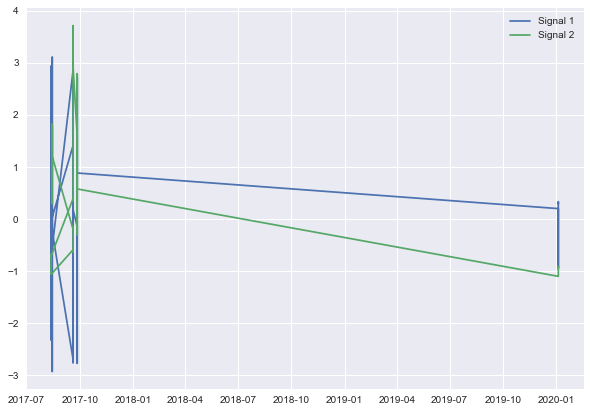

In [10]:
#plotting the normalized data
plt.figure(figsize=(10,7))
plt.plot(Signal1_norm,label='Signal 1')
plt.plot(Signal2_norm,label='Signal 2')
plt.legend()
plt.show()

In [11]:
classes = set(df['Label'])

In [12]:
print(classes)

{'B', 'A', 'C'}


In [13]:
#Storring the normalized Data
Signal1A = normalize(df[df['Label']=='A']['Signal1'])
Signal1B = normalize(df[df['Label']=='B']['Signal1'])
Signal1C = normalize(df[df['Label']=='C']['Signal1'])

Signal2A = normalize(df[df['Label']=='A']['Signal2'])
Signal2B = normalize(df[df['Label']=='B']['Signal2'])
Signal2C = normalize(df[df['Label']=='C']['Signal2'])

### Plotting the Normalized data

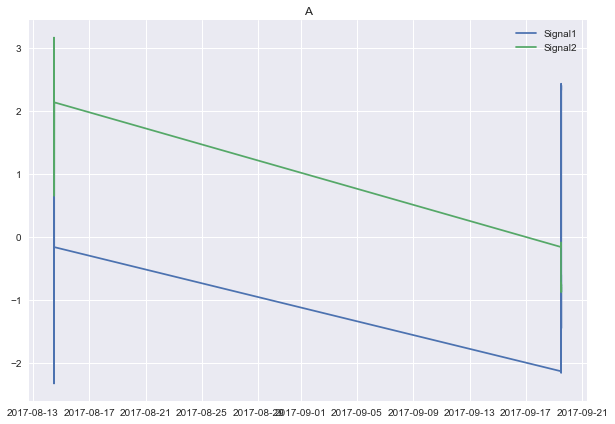

In [14]:
plt.figure(figsize=(10,7))
plt.plot(Signal1A,label='Signal1')
plt.plot(Signal2A,label='Signal2')
plt.title("A")
plt.legend()
plt.show()

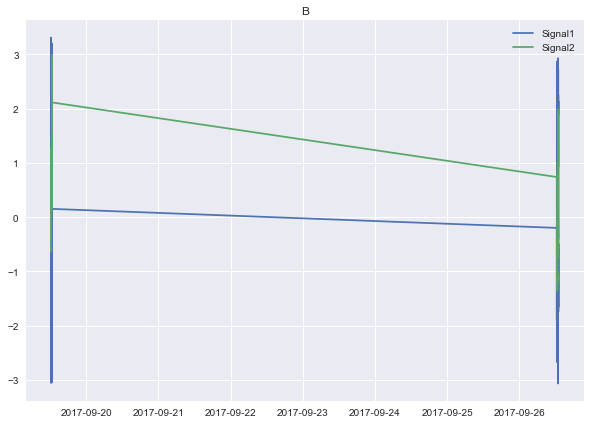

In [15]:
plt.figure(figsize=(10,7))
plt.plot(Signal1B,label='Signal1')
plt.plot(Signal2B,label='Signal2')
plt.title("B")
plt.legend()
plt.show()

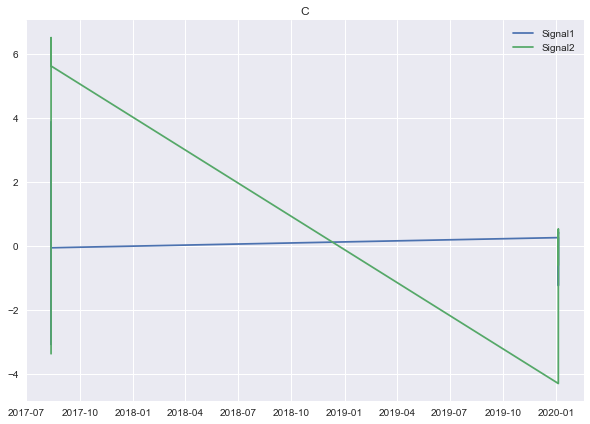

In [16]:
plt.figure(figsize=(10,7))
plt.plot(Signal1C,label='Signal1')
plt.plot(Signal2C,label='Signal2')
plt.title("C")
plt.legend()
plt.show()

## Hurst Exponent

In [17]:
# http://www.wseas.us/e-library/transactions/mathematics/2010/88-408.pdf

In [18]:
from hurst import compute_Hc

In [19]:
# Plotting the Hurst Exponent 
def plot_Hurst(H,c,val):
    axes = plt.subplots()[1]
    axes.plot(val[0], c*val[0]**H, color="blue")
    axes.scatter(val[0], val[1], color="red")
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel('Time interval')
    axes.set_ylabel('R/S ratio')
    axes.grid(True)
    plt.show()

In [20]:
# creating a dictionary to store Hurst exponent value
hurst_exponent = {
    '1':{},
    '2':{}
}

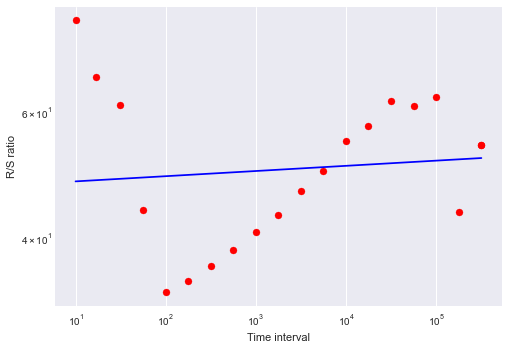

Hurst Exponent : 0.007246388937073725


In [21]:
H,c,val = compute_Hc(Signal1A)

plot_Hurst(H,c,val)
hurst_exponent['1']['A'] = H
print("Hurst Exponent :",H)

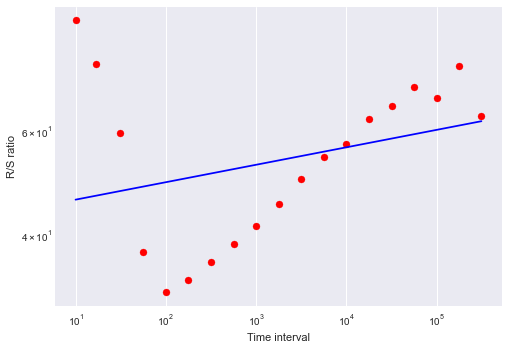

Hurst Exponent : 0.029550640035149907


In [22]:
H,c,val = compute_Hc(Signal1B)

plot_Hurst(H,c,val)
hurst_exponent['1']['B'] = H
print("Hurst Exponent :",H)

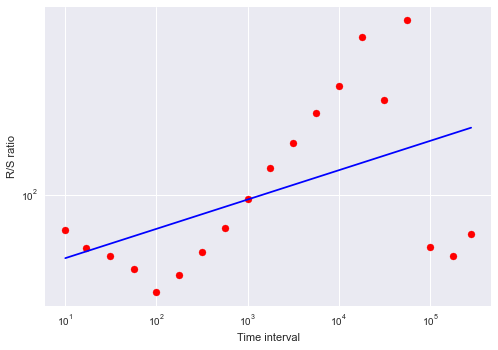

Hurst Exponent : 0.13150856195815905


In [23]:
H,c,val = compute_Hc(Signal1C)

plot_Hurst(H,c,val)
hurst_exponent['1']['C'] = H
print("Hurst Exponent :",H)

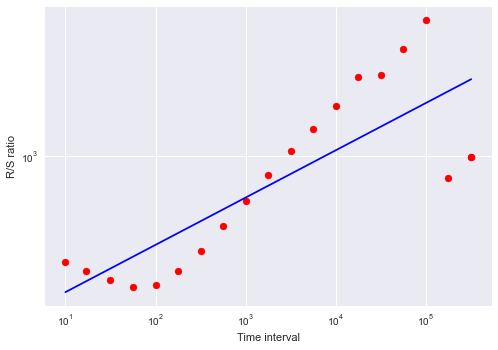

Hurst Exponent : 0.2982042999258796


In [24]:
H,c,val = compute_Hc(Signal2A)

plot_Hurst(H,c,val)
hurst_exponent['2']['A'] = H
print("Hurst Exponent :",H)

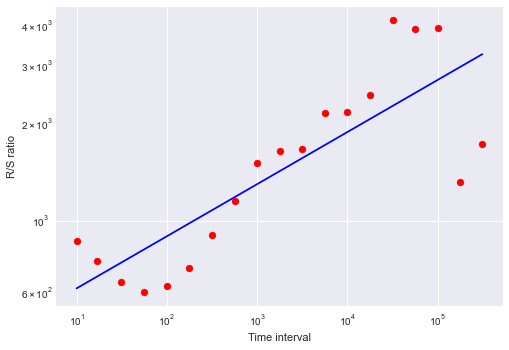

Hurst Exponent : 0.16049657772094827


In [25]:
H,c,val = compute_Hc(Signal2B)

plot_Hurst(H,c,val)
hurst_exponent['2']['B'] = H
print("Hurst Exponent :",H)

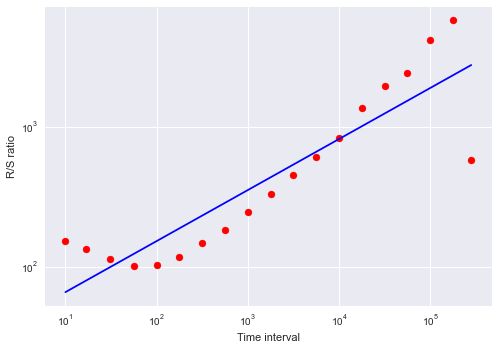

Hurst Exponent : 0.3647263799490755


In [26]:
H,c,val = compute_Hc(Signal2C)

plot_Hurst(H,c,val)
hurst_exponent['2']['C'] = H
print("Hurst Exponent :",H)

In [27]:
hurst_exponent

{'1': {'A': 0.007246388937073725,
  'B': 0.029550640035149907,
  'C': 0.13150856195815905},
 '2': {'A': 0.2982042999258796,
  'B': 0.16049657772094827,
  'C': 0.3647263799490755}}

In [28]:
def influenced_for_hurst(H):
    if H == 0.5:
        return "Brownian"
    elif H>0.5:
        return "Persistent" 
    else:
        return "Anti-Persistent"

In [29]:
hurst_exponent_influence  = {}
for signal,value in hurst_exponent.items():
    hurst_exponent_influence[signal] = {}
    for label,val in value.items():
        hurst_exponent_influence[signal][label] = influenced_for_hurst(val)

In [30]:
hurst_exponent_influence

{'1': {'A': 'Anti-Persistent', 'B': 'Anti-Persistent', 'C': 'Anti-Persistent'},
 '2': {'A': 'Anti-Persistent', 'B': 'Anti-Persistent', 'C': 'Anti-Persistent'}}

**Since both data value are Anti-Peristent, their values will tend to go against their existing trends.That is, those values which are increasing are predicted to decrease and vice-versa.**

**Hence Classes Showing Least Anti-Persistency will be better**

**In Signal 1,Class A is showing least Anti-Persistency Hence it is better than B and C. Class C is most Complex because of Highest H value.**

**In Signal 2,Class B is showing least Anti-Persistency Hence it is better than A and C. Class C is most complex because of Highest H value.**

### Detrended Fluctuation Analysis

In [31]:
# https://github.com/dokato/dfa
dfa_alpha = {
    '1':{},
    '2':{}
}

In [32]:
# functions to Generate DFA from given data/
def calc_rms(x, scale):
    shape = (x.shape[0]//scale, scale)
    X = np.lib.stride_tricks.as_strided(x,shape=shape)
    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)
        rms[e] = np.sqrt(np.mean((xcut-xfit)**2))
    return rms

def dfa(x, scale_lim=[5,9], scale_dens=0.25, show=True):
    y = np.cumsum(x - np.mean(x))
    scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(np.int)
    fluct = np.zeros(len(scales))
    
    for e, sc in enumerate(scales):
        fluct[e] = np.mean(np.sqrt(calc_rms(y, sc)**2))
    
    coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
    if show:
        fluctfit = 2**np.polyval(coeff,np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
    return scales, fluct, coeff[0]

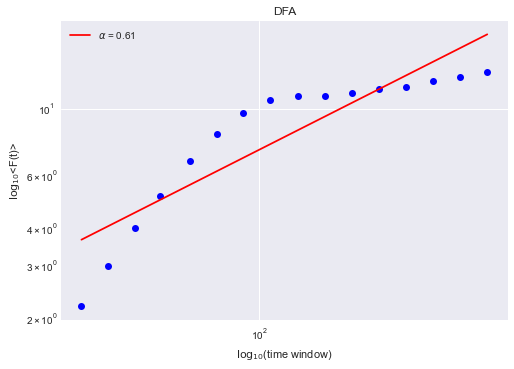

In [33]:
_,_,alpha = dfa(Signal1A)
dfa_alpha['1']['A'] = alpha

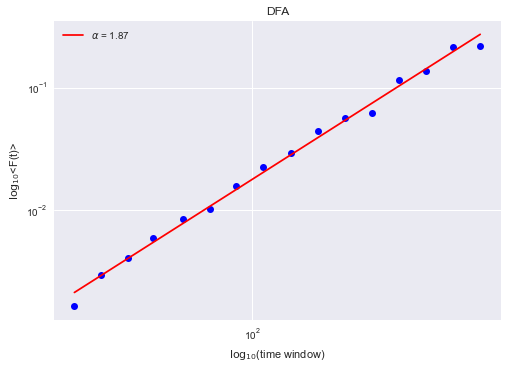

In [34]:
_,_,alpha = dfa(Signal2A)
dfa_alpha['2']['A'] = alpha

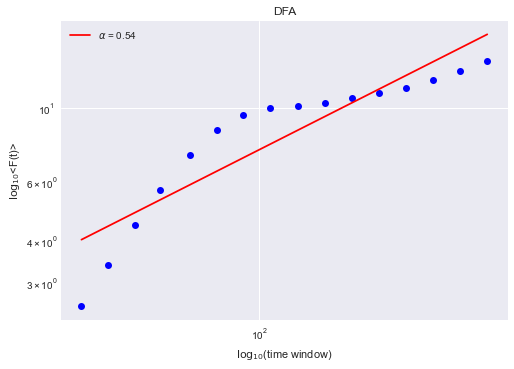

In [35]:
_,_,alpha = dfa(Signal1B)
dfa_alpha['1']['B'] = alpha

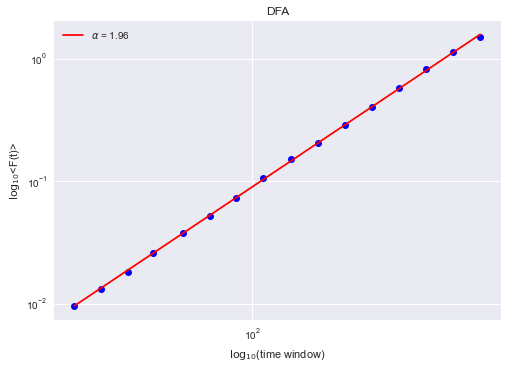

In [36]:
_,_,alpha = dfa(Signal2B)
dfa_alpha['2']['B'] = alpha

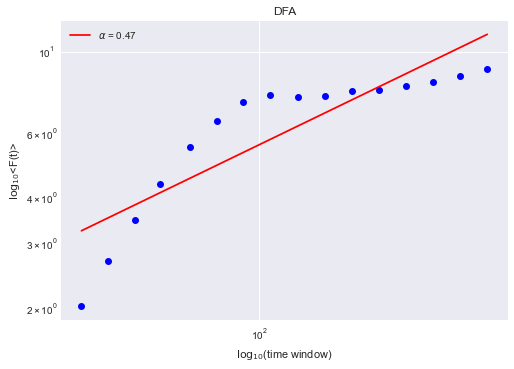

In [37]:
_,_,alpha = dfa(Signal1C)
dfa_alpha['1']['C'] = alpha

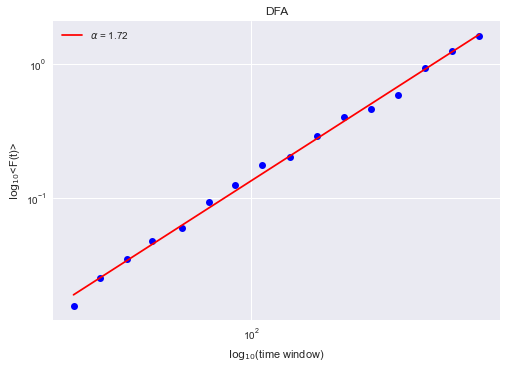

In [38]:
_,_,alpha = dfa(Signal2C)
dfa_alpha['2']['C'] = alpha

In [39]:
dfa_alpha

{'1': {'A': 0.6081465367900883,
  'B': 0.5418611814341687,
  'C': 0.47403345538944947},
 '2': {'A': 1.87192673933453, 'B': 1.9643389634355373, 'C': 1.724867959261313}}

**In DFA Analysis we find Higher the value the better the signal**

**In Signal 1, A is having highest Value So it is better than B and C.Class C is more complex because of Lowest alpha value.**

**In Signal 2, B is having highest value So it is better than A and C.Class C is more complex because of Lowest alpha value.**

### Higuchi’s Fractal Dimensions

In [40]:
## pip install git+https://github.com/forrestbao/pyeeg.git
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070217/
# https://www.hindawi.com/journals/cin/2011/406391/tab1/
# http://pyeeg.sourceforge.net/

In [41]:
from pyeeg import hfd

In [42]:
k_max = 5 # k_max is constant same for all.
hfd_dict = {
    '1':{},
    '2':{}
}

In [43]:
# findign hdf of all signals and assigning them in dictionary
hfd_dict['1']['A'] = hfd(Signal1A,k_max)
hfd_dict['1']['B'] = hfd(Signal1B,k_max)
hfd_dict['1']['C'] = hfd(Signal1C,k_max)
hfd_dict['2']['A'] = hfd(Signal2A,k_max)
hfd_dict['2']['B'] = hfd(Signal2B,k_max)
hfd_dict['2']['C'] = hfd(Signal2C,k_max)

In [44]:
hfd_dict

{'1': {'A': 0.003661217616954603,
  'B': 0.005469063460062689,
  'C': 0.006172784925619998},
 '2': {'A': 0.0004715978582135415,
  'B': 6.126665032142667e-05,
  'C': 0.0008694073639268232}}

**Lower the value of HFD better the result**

**In Signal 1, Class A has less value hence it is better than class B and C.Class C is more complex since it has highest value.**

**In Signal 2, Class B has less value hence it is better than class A and C.Class C is more complex since it has highest value.**

----
**Thank You**

*Jayant Goel*